#📌 Extracción

In [107]:
import pandas as pd
import json

# Nombre del archivo JSON
file_name = '/content/TelecomX_Data.json'

# Cargar el archivo JSON
try:
    with open(file_name, 'r') as f:
        data = json.load(f)
except FileNotFoundError:
    print(f"Error: El archivo '{file_name}' no se encuentra.")
    exit()



# Normalizar los datos para aplanar completamente la estructura anidada.
# pandas se encargará de crear columnas con nombres anidados (usando puntos).
df = pd.json_normalize(data)

# Imprimir las primeras filas del DataFrame para que veas el resultado
print("DataFrame resultante con la estructura aplanada:")
print(df.head())
print("\nColumnas del DataFrame:")
print(df.columns)

DataFrame resultante con la estructura aplanada:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes        

In [108]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [109]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [110]:
import numpy as np


# Reemplazar los espacios en blanco por valores nulos
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)

# Convertir la columna a float64 y rellenar los valores nulos con 0
df['account.Charges.Total'] = df['account.Charges.Total'].astype(np.float64).fillna(0)

In [111]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [112]:

# 1. Valores ausentes
missing_values = df['customerID'].isnull().sum()
print(f"Número de valores ausentes en 'customerID': {missing_values}")
print("-" * 50)

# 2. Duplicados
duplicate_rows = df['customerID'].duplicated().sum()
print(f"Número de valores duplicados en 'customerID': {duplicate_rows}")
print("-" * 50)

# 3. Formato e inconsistencias (validar si todos son cadenas de texto)
if all(isinstance(x, str) for x in df['customerID']):
    print("Todos los valores en 'customerID' son cadenas de texto (strings).")
    # Para una validación más profunda, puedes revisar la longitud o el patrón
    # Por ejemplo, verificar que todos tengan 10 caracteres
    if all(len(x) == 10 for x in df['customerID']):
        print("Todos los customerID tienen 10 caracteres de longitud.")
    else:
        print("Hay customerID con longitudes inconsistentes.")
else:
    print("Hay valores en 'customerID' que no son cadenas de texto.")

Número de valores ausentes en 'customerID': 0
--------------------------------------------------
Número de valores duplicados en 'customerID': 0
--------------------------------------------------
Todos los valores en 'customerID' son cadenas de texto (strings).
Todos los customerID tienen 10 caracteres de longitud.


In [106]:
# Creación de la columna "Cuentas_Diarias"

# Asumimos que un mes tiene un promedio de 30 días para el cálculo.
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

# Mostrar las primeras filas del DataFrame para ver la nueva columna
print("DataFrame con la nueva columna 'Cuentas_Diarias':")
print(df.head())
print("\nTipos de datos actualizados:")
print(df.info())

DataFrame con la nueva columna 'Cuentas_Diarias':
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes       

#🔧 Transformación

In [113]:
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035
std,0.369074,24.571773,30.129572,2268.648587
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.425000,396.200000
50%,0.000000,29.000000,70.300000,1389.200000
75%,0.000000,55.000000,89.875000,3778.525000
max,1.000000,72.000000,118.750000,8684.800000


#📊 Carga y análisis

/tmp/ipython-input-2980045789.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_filtered, palette='viridis', order=df_filtered['Churn'].value_counts().index)


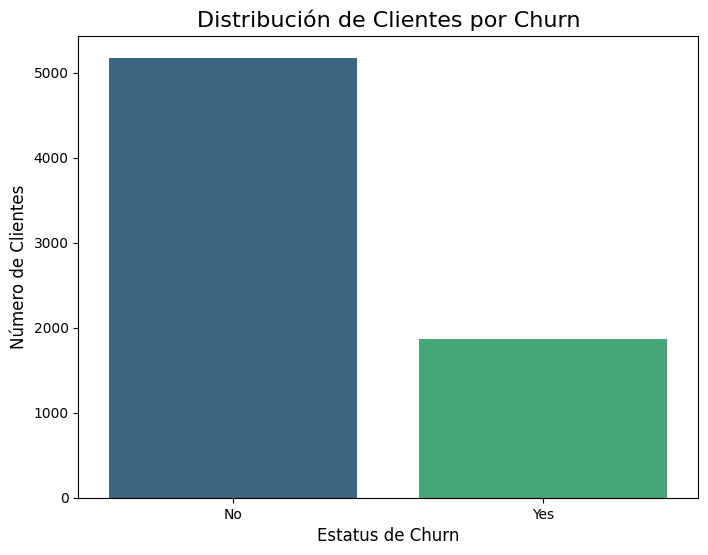

In [122]:
#  Visualización de la distribución de 'Churn'  evasión
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar el DataFrame para incluir solo 'Yes' o 'No' en 'Churn'
df_filtered = df[df['Churn'].isin(['Yes', 'No'])].copy()



# Gráfico de barras (Count Plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df_filtered, palette='viridis', order=df_filtered['Churn'].value_counts().index)
plt.title('Distribución de Clientes por Churn', fontsize=16)
plt.xlabel('Estatus de Churn', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.show()


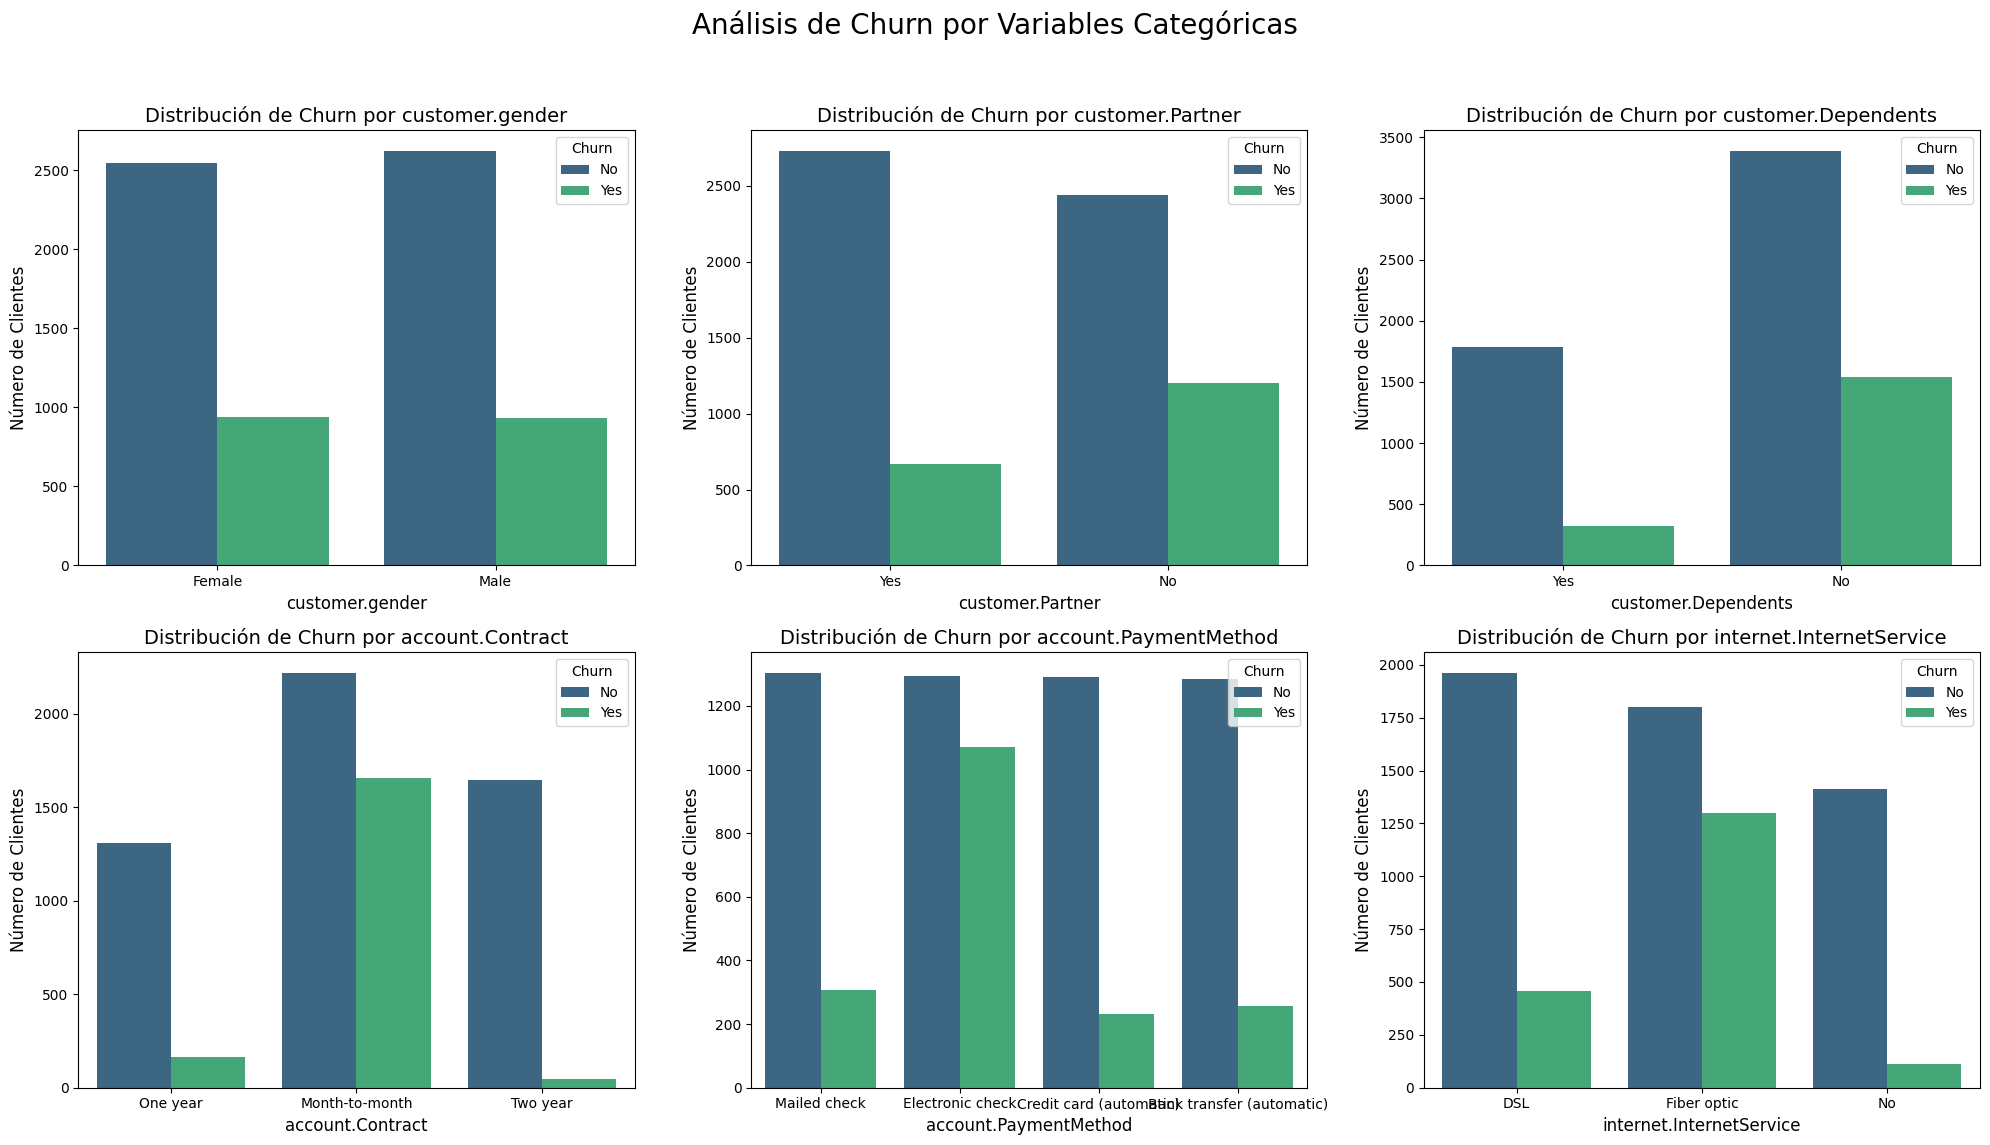

In [124]:

#  Visualizaciones para Churn y otras variables categóricas

# Lista de variables categóricas a analizar
categorical_vars = ['customer.gender', 'customer.Partner', 'customer.Dependents', 'account.Contract', 'account.PaymentMethod', 'internet.InternetService']

# Crear un subplot para mostrar múltiples gráficos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
fig.suptitle('Análisis de Churn por Variables Categóricas', fontsize=20)

for i, var in enumerate(categorical_vars):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.countplot(x=var, hue='Churn', data=df_filtered, palette='viridis', ax=ax)
    ax.set_title(f'Distribución de Churn por {var}', fontsize=14)
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Número de Clientes', fontsize=12)
    ax.legend(title='Churn', loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#📄Informe final